In [1]:
# Useful starting lines
%timeit
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from preprocessing import *
from train_tune import *
from proj1_helpers import *
#import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [99]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
map2name,map2num = mapping(DATA_TRAIN_PATH)


#### PROCESSING

In [2]:
import numpy as np
np.exp(-1)/(1+np.exp(-1))

0.2689414213699951

In [100]:
from preprocessing import cluster_preprocessing_train, cluster_preprocessing_test
from proj1_helpers import cluster_predict
#TRAINING PART
#loading data
print("::: LOADING DATA :::\n")
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
name2num,num2name = mapping(DATA_TRAIN_PATH)
#Train preprocessing
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = cluster_preprocessing_train(tx_train,y,num2name)

::: LOADING DATA :::

PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

REMOVING LAST COL for TX0
Taking the log of the following features : 
 ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt', 'PRI_lep_pt', 'PRI_met', 'PRI_met_sumet']
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done


### *Initial test to check loss convergence, initial weights, gamma, n_iters, etc.*

Iterating over 1750 epochs
Early convergence at epoch = 537. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 200. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 505. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 1009. diff(loss)<=1.500000e-05


Text(0.5, 0.98, 'logistic reg losses, for clusters, n_iters = 1750 gamma = 2.3e-06')

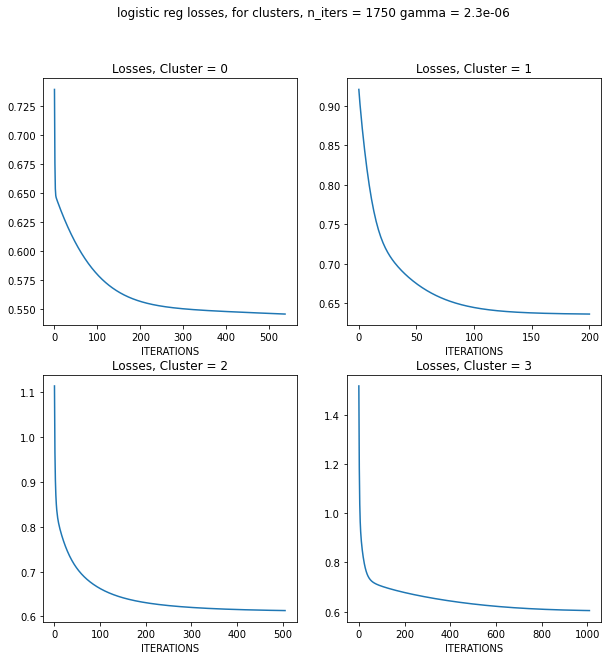

In [93]:
n_iters = 1750
gamma = 2.3e-6
# using the same initial values for each cluster-
tx0 = add_bias(tx0)
tx1 = add_bias(tx1)
tx2 = add_bias(tx2)
tx3 = add_bias(tx3)

w_init0 = np.random.randn(tx0.shape[1],1) 
w_init1 = np.random.randn(tx1.shape[1],1)
w_init2 = np.random.randn(tx2.shape[1],1)
w_init3 = np.random.randn(tx3.shape[1],1)

w0, _, losses0 = logistic_regression(y0, tx0, w_init0, n_iters, gamma)
w1, _, losses1 = logistic_regression(y1, tx1, w_init1, n_iters, gamma)
w2, _, losses2 = logistic_regression(y2, tx2, w_init2, n_iters, gamma)
w3, _, losses3 = logistic_regression(y3, tx3, w_init3, n_iters, gamma)

fig, axes = plt.subplots(2,2,figsize=(10,10),sharex =False)
ax = axes.ravel()
ax[0].plot(losses0)
ax[1].plot(losses1)
ax[2].plot(losses2)
ax[3].plot(losses3)

ax[0].set_title("Losses, Cluster = 0")
ax[1].set_title("Losses, Cluster = 1")
ax[2].set_title("Losses, Cluster = 2")
ax[3].set_title("Losses, Cluster = 3")

ax[0].set_xlabel("ITERATIONS")
ax[1].set_xlabel("ITERATIONS")
ax[2].set_xlabel("ITERATIONS")
ax[3].set_xlabel("ITERATIONS")

fig.suptitle("logistic reg losses, for clusters, n_iters = {} gamma = {}".format(n_iters, gamma))

Iterating over 1750 epochs
Early convergence at epoch = 1534. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 247. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 184. diff(loss)<=1.500000e-05
Iterating over 1750 epochs
Early convergence at epoch = 1200. diff(loss)<=1.500000e-05


Text(0.5, 0.98, 'ReguLog losses, for clusters, n_iters = 1750 \n lambda = 5e-05, gamma = 2.3e-06')

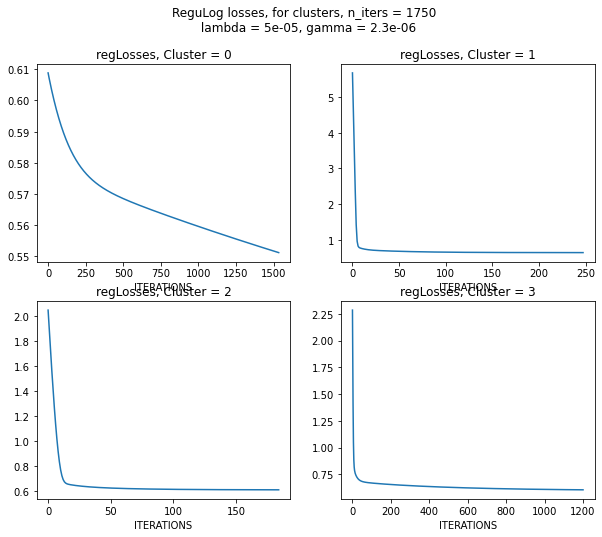

In [58]:
n_iters = 1750
gamma = 2.3e-6
lambda0 = 5e-5
# using the same initial values for each cluster-
w_init0 = np.random.randn(tx0.shape[1],1) 
w_init1 = np.random.randn(tx1.shape[1],1)
w_init2 = np.random.randn(tx2.shape[1],1)
w_init3 = np.random.randn(tx3.shape[1],1)

_, _, reglosses0 = reg_logistic_regression(y0, tx0, lambda0, w_init0, n_iters, gamma)
_, _, reglosses1 = reg_logistic_regression(y1, tx1, lambda0, w_init1, n_iters, gamma)
_, _, reglosses2 = reg_logistic_regression(y2, tx2, lambda0, w_init2, n_iters, gamma)
_, _, reglosses3 = reg_logistic_regression(y3, tx3, lambda0, w_init3, n_iters, gamma)

fig, axes = plt.subplots(2,2,figsize=(10,8),sharex =False)
ax = axes.ravel()
ax[0].plot(reglosses0)
ax[1].plot(reglosses1)
ax[2].plot(reglosses2)
ax[3].plot(reglosses3)

ax[0].set_title("regLosses, Cluster = 0")
ax[1].set_title("regLosses, Cluster = 1")
ax[2].set_title("regLosses, Cluster = 2")
ax[3].set_title("regLosses, Cluster = 3")

ax[0].set_xlabel("ITERATIONS")
ax[1].set_xlabel("ITERATIONS")
ax[2].set_xlabel("ITERATIONS")
ax[3].set_xlabel("ITERATIONS")

fig.suptitle("ReguLog losses, for clusters, n_iters = {} \n lambda = {}, gamma = {}".format(n_iters, lambda0,gamma))

In [101]:
#K-fold CV
k_fold=5
#USING FEWER ITERATIONS DUE TO HOW MASSIVE THIS GRIDSEARCH IS.
n_iters = 1500
gamma = 2.3e-6
lambdas = np.logspace(-9,-1,12)
degrees = np.array(range(1,12))
tx0 = np.delete(tx0,-1,1)

In [ ]:
wlog0, dlog0, _, train0, test0 = crossval_regulog_gridsearch(y0,tx0,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True)
cv_viz(dlog0,lambdas,train0[dlog0-1,:],test0[dlog0-1,:])



In [ ]:
wlog1, dlog1, _, train1, test1 = crossval_regulog_gridsearch(y1,tx1,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True)
cv_viz(dlog1,lambdas,train1[dlog1-1,:],test0[dlog1-1,:])

In [ ]:
wlog2, dlog2, _, train2, test2 = crossval_regulog_gridsearch(y2,tx2,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True)
cv_viz(dlog2,lambdas,train2[dlog2-1,:],test0[dlog2-1,:])

In [ ]:
wlog3, dlog3, _, train3, test3 = crossval_regulog_gridsearch(y3,tx3,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True)
cv_viz(dlog3,lambdas,train3[dlog3-1,:],test0[dlog3-1,:])

In [ ]:
degs=[dlog0,dlog1,dlog2,dlog3]

## Generate predictions and save ouput in csv format for submission:

### TWO CELLS TO RETRY EVERYTHING AT ONCE 

from the results from regulog_gridsearch : 

In [6]:
from preprocessing import cluster_preprocessing_train, cluster_preprocessing_test
from proj1_helpers import cluster_predict
#TRAINING PART
#loading data
print("::: LOADING DATA :::\n")
#RELOADING
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tx_train, ids = load_csv_data(DATA_TRAIN_PATH)
names= get_feature_names(DATA_TRAIN_PATH)
num2name,name2num = mapping(DATA_TRAIN_PATH)

::: LOADING DATA :::



In [4]:
degrees = [1,2,3]
lambdas = np.logspace(-7,-2,3)
k_fold = 5
wlog0, dlog0, la0, train0, test0 = crossval_regulog_gridsearch(y0,tx0,k_fold,
                                                             lambdas,degrees,
                                                             n_iters,gamma,loss=True, tol=1e-6)
cv_viz(dlog0,lambdas,train0[dlog0-1,:],test0[dlog0-1,:],save=False)


In [7]:
degs = [1,1,1,1]
tx0, y0, tx1, y1, tx2, y2, tx3, y3, id0, id1, id2, id3 = cluster_preprocessing_train(tx_train,y,num2name)
tx0, tx1, tx2, tx3 = cluster_buildpoly(tx0,tx1,tx2,tx3,degs)
tx0.shape


PREPROCESSING TRAIN DATA 
 Clustering w.r.t. to PRI_jet_num numbers
Prediction targets detected. Using a training set. 
 Returning clusterized dataset and targets. 

REMOVING LAST COL for TX0
Taking the log of the following features : 
 [None, None, None, None, None, None, None, None, None, None]
Removing features with all -999 rows. Returning indices for later
10 features deleted
7 features deleted
0 features deleted
0 features deleted
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Preprocessing done


(99913, 20)

Text(0.5, 0.98, 'ReguLog losses, for clusters, n_iters = 2000 \n , gamma = 2e-06')

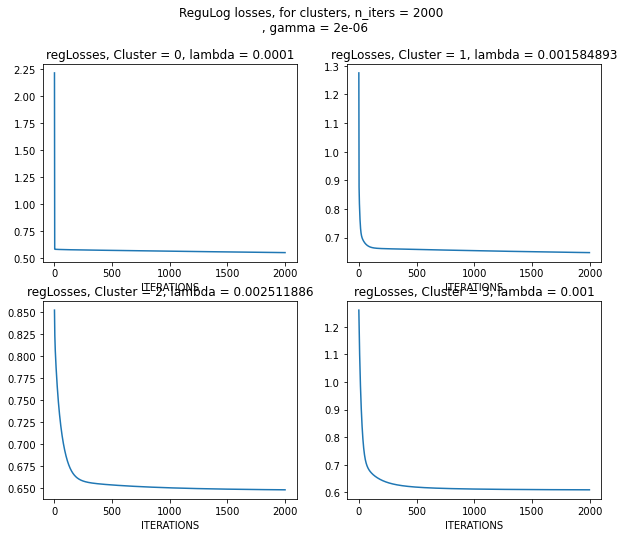

In [11]:
from implementations import *
# regulog with no tolerance.
n_iters = 2000
gamma = 2e-6
lambdas = [1.000000e-04, 1.584893e-03, 2.511886e-03, 1.000000e-03]

# using the same initial values for each cluster-
w_init0 = np.random.randn(tx0.shape[1],1) 
w_init1 = np.random.randn(tx1.shape[1],1)
w_init2 = np.random.randn(tx2.shape[1],1)
w_init3 = np.random.randn(tx3.shape[1],1)

w_log_opt0, _, reglosses0 = reg_logistic_regression(y0, tx0, lambdas[0], w_init0, n_iters, gamma,tol=1e-6)
w_log_opt1, _, reglosses1 = reg_logistic_regression(y1, tx1, lambdas[1], w_init1, n_iters, gamma,tol=1e-6)
w_log_opt2, _, reglosses2 = reg_logistic_regression(y2, tx2, lambdas[2], w_init2, n_iters, gamma,tol=1e-6)
w_log_opt3, _, reglosses3 = reg_logistic_regression(y3, tx3, lambdas[3], w_init3, n_iters, gamma,tol=1e-6)

fig, axes = plt.subplots(2,2,figsize=(10,8),sharex =False)
ax = axes.ravel()
ax[0].plot(reglosses0)
ax[1].plot(reglosses1)
ax[2].plot(reglosses2)
ax[3].plot(reglosses3)

ax[0].set_title("regLosses, Cluster = 0, lambda = {}".format(lambdas[0]))
ax[1].set_title("regLosses, Cluster = 1, lambda = {}".format(lambdas[1]))
ax[2].set_title("regLosses, Cluster = 2, lambda = {}".format(lambdas[2]))
ax[3].set_title("regLosses, Cluster = 3, lambda = {}".format(lambdas[3]))

ax[0].set_xlabel("ITERATIONS")
ax[1].set_xlabel("ITERATIONS")
ax[2].set_xlabel("ITERATIONS")
ax[3].set_xlabel("ITERATIONS")

fig.suptitle("ReguLog losses, for clusters, n_iters = {} \n , gamma = {}".format(n_iters,gamma))

In [2]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' # TODO: fill in desired name of output file for submission


In [13]:
#TESTING PART

#Getting test-data
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../submissions/' 
#Test preprocessing
degs = [1,1,1,1]

In [14]:
test0, i0, test1, i1, test2, i2, test3, i3 = cluster_preprocessing_test(tX_test, id0, id1,
                                                                 id2, id3, degs, num2name)
#Prediction

yclusterpred_log = cluster_predict(w_log_opt0,w_log_opt1,w_log_opt2,w_log_opt3,
                               test0,test1,test2,test3,
                               i0,i1,i2,i3,how="log")

create_csv_submission(ids_test, yclusterpred_log, OUTPUT_PATH+"clusterREGULOG_postcrossval.csv")

PREPROCESSING TEST DATA 
 Clustering w.r.t. to PRI_jet_num numbers
No targets detected. Using a test-set. 
 Returning clusterized dataset and indices. 

REMOVING LAST COL for TX0
Taking the log of the following features : 
 [None, None, None, None, None, None, None, None, None, None]
deleting corresponding columns
Replacing -999 values with mean
Standardizing : Setting mean to 0 and variance to 1
Augmenting features
Preprocessing done, returning clusterized test set and indices
Prediction for log regression
